In [14]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [10]:
df = pd.read_csv('Walmart.csv')

In [66]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [13]:
df.loc[df.duplicated(subset=['Weekly_Sales'])].head(5)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


<Axes: >

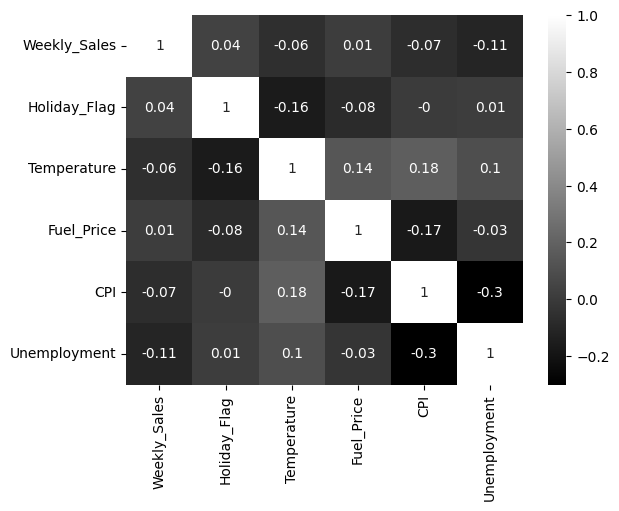

In [64]:
cols = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
corrMtrx = df[cols].corr().round(2)
corrMtrx.to_csv('corr.csv')
sns.heatmap(corrMtrx, annot=True, cmap='gray')

In [45]:
#removing unnecesary columns correlation visualization
cols = list(df.columns)
cols.remove('Date')
cols.remove('Store')
cols.remove('Weekly_Sales')

print(cols)

['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


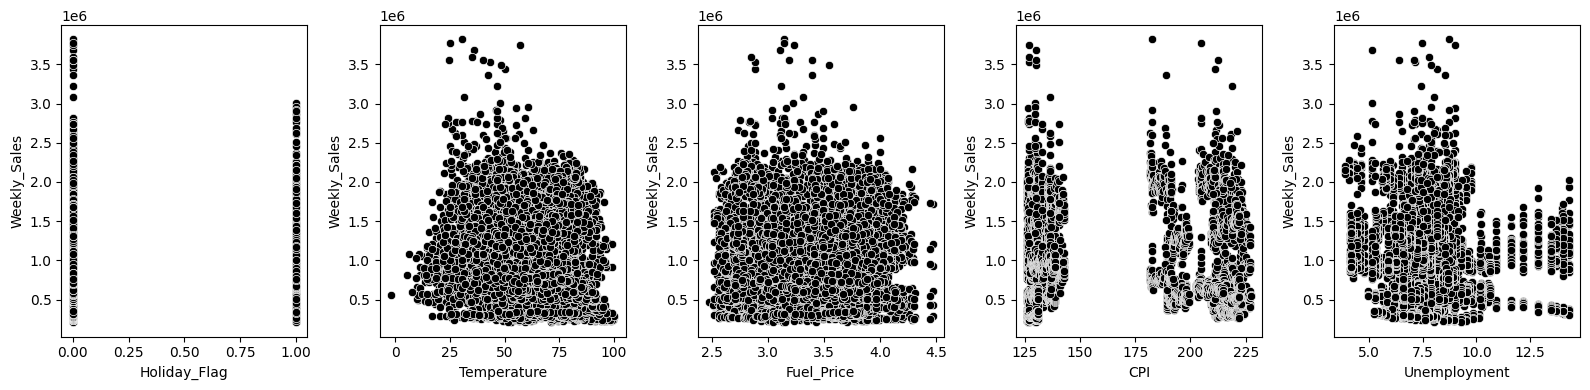

In [53]:
# Set the number of rows and columns for subplots
n_cols = len(cols)
n_rows = 1  # You can adjust this based on your preference

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4))  # Adjust figsize as needed

# Flatten the axes array if there's only one row
if n_rows == 1:
    axes = axes.reshape(1, -1)

for i, col in enumerate(cols):
    ax = axes[0, i]  # Get the current subplot
    sns.scatterplot(y='Weekly_Sales', x=col, data=df, ax=ax, color='black')
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()
